# Coplanar Double Pendulum Hamiltonian and Canonical Equations

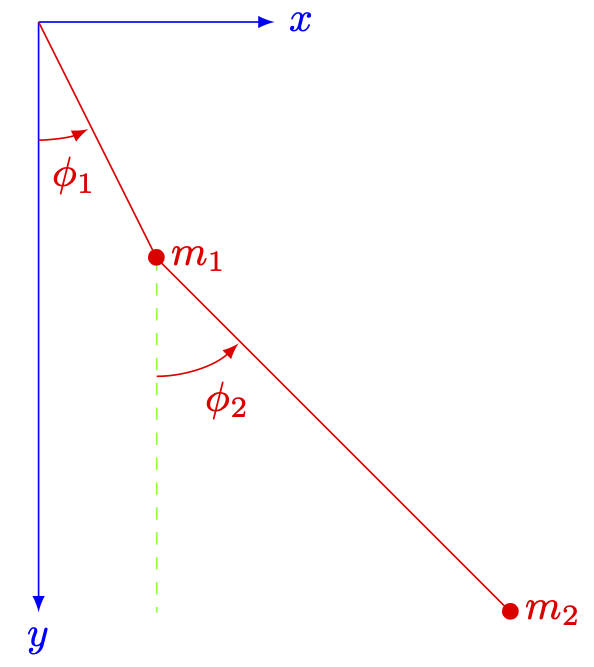

##Preamble

In [1]:
import sympy as sp

Symbolic variables

In [2]:
t,l1,l2,m1,m2,g=sp.symbols('t,l1,l2,m1,m2,g',positive=True)

Generalized coordinates

In [3]:
phi1,phi2=sp.Function('phi1')(t),sp.Function('phi2')(t)

Cartesian Coordinates

In [4]:
x1=l1*sp.sin(phi1)
x2=l1*sp.sin(phi1)+l2*sp.sin(phi2)
y1=l1*sp.cos(phi1)
y2=l1*sp.cos(phi1)+l2*sp.cos(phi2)

Cartesian velocities

In [5]:
dot_x1=x1.diff(t)
dot_y1=y1.diff(t)
dot_x2=x2.diff(t)
dot_y2=y2.diff(t)

## Kinetic Energy $T$

In [6]:
T=sp.simplify(sp.Rational(1,2)*m1*(dot_x1**2+ dot_y1**2)+sp.Rational(1,2)*m2*(dot_x2**2+ dot_y2**2))
T

l1**2*m1*Derivative(phi1(t), t)**2/2 + m2*(l1**2*Derivative(phi1(t), t)**2 + 2*l1*l2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t)*Derivative(phi2(t), t) + l2**2*Derivative(phi2(t), t)**2)/2

## Potential Energy $U$ (notice that $y$ increases downwards)

In [7]:
U=(-m1*g*y1-m2*g*y2).simplify()
U

-g*(l1*m1*cos(phi1(t)) + l1*m2*cos(phi1(t)) + l2*m2*cos(phi2(t)))

## Lagrangian $L=T-U$

In [8]:
Lag=(T-U).simplify()
Lag

g*(l1*m1*cos(phi1(t)) + l1*m2*cos(phi1(t)) + l2*m2*cos(phi2(t))) + l1**2*m1*Derivative(phi1(t), t)**2/2 + m2*(l1**2*Derivative(phi1(t), t)**2 + 2*l1*l2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t)*Derivative(phi2(t), t) + l2**2*Derivative(phi2(t), t)**2)/2

## Conjugate Momenta

In [9]:
mom_1=(Lag.diff(phi1.diff(t)).simplify()).expand()
mom_2=(Lag.diff(phi2.diff(t)).simplify()).expand()

In [10]:
mom_1

l1**2*m1*Derivative(phi1(t), t) + l1**2*m2*Derivative(phi1(t), t) + l1*l2*m2*cos(phi1(t) - phi2(t))*Derivative(phi2(t), t)

In [11]:
mom_2

l1*l2*m2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t) + l2**2*m2*Derivative(phi2(t), t)

## Solve velocities as functions of momenta

Definition of the conjugate momenta as functions of time

In [12]:
p_1=sp.Function('p_1')(t)
p_2=sp.Function('p_2')(t)

The function **solve** finds the solution to the system of equations $\mathrm{mom}_i=p_{i}$ for the variables $\dot{\phi}_i$, and its output is a dictionary

In [13]:
sols=sp.solve([sp.Eq(mom_1,p_1),sp.Eq(mom_2,p_2)],[phi1.diff(t),phi2.diff(t)])

$\dot{\phi}_1$

In [14]:
sols[phi1.diff(t)].simplify()

(-l1*p_2(t)*cos(phi1(t) - phi2(t)) + l2*p_1(t))/(l1**2*l2*(m1 - m2*cos(phi1(t) - phi2(t))**2 + m2))

$\dot{\phi}_2$

In [15]:
sols[phi2.diff(t)].simplify()

(l1*m1*p_2(t) + l1*m2*p_2(t) - l2*m2*p_1(t)*cos(phi1(t) - phi2(t)))/(l1*l2**2*m2*(m1 - m2*cos(phi1(t) - phi2(t))**2 + m2))

## Hamiltonian: $H(\phi_i,p_i)=p_i\dot{\phi}_i-L$

Energy as a function of $\phi_i$ and $\dot{\phi}_i$

In [16]:
E=phi1.diff(t)*mom_1+phi2.diff(t)*mom_2-Lag
E

-g*(l1*m1*cos(phi1(t)) + l1*m2*cos(phi1(t)) + l2*m2*cos(phi2(t))) - l1**2*m1*Derivative(phi1(t), t)**2/2 - m2*(l1**2*Derivative(phi1(t), t)**2 + 2*l1*l2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t)*Derivative(phi2(t), t) + l2**2*Derivative(phi2(t), t)**2)/2 + (l1*l2*m2*cos(phi1(t) - phi2(t))*Derivative(phi1(t), t) + l2**2*m2*Derivative(phi2(t), t))*Derivative(phi2(t), t) + (l1**2*m1*Derivative(phi1(t), t) + l1**2*m2*Derivative(phi1(t), t) + l1*l2*m2*cos(phi1(t) - phi2(t))*Derivative(phi2(t), t))*Derivative(phi1(t), t)

Legendre transformation: Hamiltonian as a function of $\phi_i$ and $p_{\phi_i}$

In [17]:
H=E.subs([(phi1.diff(t),sols[phi1.diff(t)]),(phi2.diff(t),sols[phi2.diff(t)])]).simplify()
H

(-g*l1**3*l2**2*m1**2*m2*cos(phi1(t)) + g*l1**3*l2**2*m1*m2**2*cos(phi1(t) - phi2(t))**2*cos(phi1(t)) - 2*g*l1**3*l2**2*m1*m2**2*cos(phi1(t)) + g*l1**3*l2**2*m2**3*cos(phi1(t) - phi2(t))**2*cos(phi1(t)) - g*l1**3*l2**2*m2**3*cos(phi1(t)) - g*l1**2*l2**3*m1*m2**2*cos(phi2(t)) + g*l1**2*l2**3*m2**3*cos(phi1(t) - phi2(t))**2*cos(phi2(t)) - g*l1**2*l2**3*m2**3*cos(phi2(t)) + l1**2*m1*p_2(t)**2/2 + l1**2*m2*p_2(t)**2/2 - l1*l2*m2*p_1(t)*p_2(t)*cos(phi1(t) - phi2(t)) + l2**2*m2*p_1(t)**2/2)/(l1**2*l2**2*m2*(m1 - m2*cos(phi1(t) - phi2(t))**2 + m2))

## Canonical equations  $\dot{q}_i=\frac{\partial H}{\partial p_i}$, $\dot{p}_i=-\frac{\partial H}{\partial q_i}$

## $\dot{\phi}_1$

In [18]:
(H.diff(p_1)).simplify()

(-l1*p_2(t)*cos(phi1(t) - phi2(t)) + l2*p_1(t))/(l1**2*l2*(m1 - m2*cos(phi1(t) - phi2(t))**2 + m2))

## $\dot{\phi}_2$

In [19]:
(H.diff(p_2)).simplify()

(l1*m1*p_2(t) + l1*m2*p_2(t) - l2*m2*p_1(t)*cos(phi1(t) - phi2(t)))/(l1*l2**2*m2*(m1 - m2*cos(phi1(t) - phi2(t))**2 + m2))

## $\dot{p}_{1}$

In [20]:
(-H.diff(phi1)).simplify()

(-g*l1**3*l2**2*m1**3*sin(phi1(t)) + 2*g*l1**3*l2**2*m1**2*m2*sin(phi1(t))*cos(phi1(t) - phi2(t))**2 - 3*g*l1**3*l2**2*m1**2*m2*sin(phi1(t)) - g*l1**3*l2**2*m1*m2**2*sin(phi1(t))*cos(phi1(t) - phi2(t))**4 + 4*g*l1**3*l2**2*m1*m2**2*sin(phi1(t))*cos(phi1(t) - phi2(t))**2 - 3*g*l1**3*l2**2*m1*m2**2*sin(phi1(t)) - g*l1**3*l2**2*m2**3*sin(phi1(t))*cos(phi1(t) - phi2(t))**4 + 2*g*l1**3*l2**2*m2**3*sin(phi1(t))*cos(phi1(t) - phi2(t))**2 - g*l1**3*l2**2*m2**3*sin(phi1(t)) + l1**2*m1*p_2(t)**2*sin(2*phi1(t) - 2*phi2(t))/2 + l1**2*m2*p_2(t)**2*sin(2*phi1(t) - 2*phi2(t))/2 - l1*l2*m1*p_1(t)*p_2(t)*sin(phi1(t) - phi2(t)) - l1*l2*m2*p_1(t)*p_2(t)*sin(phi1(t) - phi2(t))*cos(phi1(t) - phi2(t))**2 - l1*l2*m2*p_1(t)*p_2(t)*sin(phi1(t) - phi2(t)) + l2**2*m2*p_1(t)**2*sin(2*phi1(t) - 2*phi2(t))/2)/(l1**2*l2**2*(m1**2 - 2*m1*m2*cos(phi1(t) - phi2(t))**2 + 2*m1*m2 + m2**2*cos(phi1(t) - phi2(t))**4 - 2*m2**2*cos(phi1(t) - phi2(t))**2 + m2**2))

## $\dot{p}_{2}$

In [21]:
(-H.diff(phi2)).simplify()

(-g*l1**2*l2**3*m1**2*m2*sin(phi2(t)) + 2*g*l1**2*l2**3*m1*m2**2*sin(phi2(t))*cos(phi1(t) - phi2(t))**2 - 2*g*l1**2*l2**3*m1*m2**2*sin(phi2(t)) - g*l1**2*l2**3*m2**3*sin(phi2(t))*cos(phi1(t) - phi2(t))**4 + 2*g*l1**2*l2**3*m2**3*sin(phi2(t))*cos(phi1(t) - phi2(t))**2 - g*l1**2*l2**3*m2**3*sin(phi2(t)) - l1**2*m1*p_2(t)**2*sin(2*phi1(t) - 2*phi2(t))/2 - l1**2*m2*p_2(t)**2*sin(2*phi1(t) - 2*phi2(t))/2 + l1*l2*m1*p_1(t)*p_2(t)*sin(phi1(t) - phi2(t)) + l1*l2*m2*p_1(t)*p_2(t)*sin(phi1(t) - phi2(t))*cos(phi1(t) - phi2(t))**2 + l1*l2*m2*p_1(t)*p_2(t)*sin(phi1(t) - phi2(t)) - l2**2*m2*p_1(t)**2*sin(2*phi1(t) - 2*phi2(t))/2)/(l1**2*l2**2*(m1**2 - 2*m1*m2*cos(phi1(t) - phi2(t))**2 + 2*m1*m2 + m2**2*cos(phi1(t) - phi2(t))**4 - 2*m2**2*cos(phi1(t) - phi2(t))**2 + m2**2))